## **Sentiment Analysis using LSTM (Long short-term memory) and GRU ( Gated Recurrent Units)**




In [ ]:
import numpy as np
import pandas as pd
import keras

In [ ]:
from keras.datasets import imdb

In [ ]:
num_classification_words = 20000
words_limit = 100

The RNN (LSTM, GRU) will take sequences of constant length. This length is the `words_limit` which is defined to be 100. Since the reviews differ heavily in terms of lengths, I will trim each review to its first 100 words. If reviews are shorter than **100** words I will pad them with zeros.

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_classification_words)

In [ ]:
x_train.shape[0]

25000

In [ ]:
# Decode the integer sequences back into words
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print("Sample Reviews:")
for i in range(3):
    decoded_review = ' '.join([reverse_word_index.get(index - 3, '?') for index in x_train[i]])
    print("REVIEW", i+1)
    print(decoded_review)
    print("Label:", y_train[i])
    print()


Sample Reviews:
REVIEW 1
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

## Data PreProcessing

In [ ]:
from keras.preprocessing import sequence

In [ ]:
from tensorflow.keras.preprocessing import sequence

x_train_seq = sequence.pad_sequences(x_train, maxlen=words_limit)
x_test_seq = sequence.pad_sequences(x_test, maxlen=words_limit)

print('train shape:', x_train_seq.shape)
print('test shape:', x_test_seq.shape)


train shape: (25000, 100)
test shape: (25000, 100)


In [ ]:
x_train_seq = sequence.pad_sequences(x_train, maxlen=words_limit)
x_test_seq = sequence.pad_sequences(x_test, maxlen=words_limit)

print('train shape:', x_train_seq.shape)
print('test shape:', x_test_seq.shape)

train shape: (25000, 100)
test shape: (25000, 100)


In [ ]:
x_train_seq

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ...,
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Activation, Input, LSTM, GRU

## LSTM Model for Sentiment Analysis


The model architecture consists of an input layer, an embedding layer, an LSTM layer, dropout regularization, a dense layer, and a sigmoid activation function for classification.

In [ ]:
lstm_input = Input(shape=(100,))
embedding = Embedding(num_classification_words, 128, input_length=words_limit)(lstm_input)
simple_lstm = LSTM(128)(embedding)
dropout = Dropout(0.4)(simple_lstm)
dense = Dense(1)(dropout)
activation = Activation('sigmoid')(dense)
model = Model(lstm_input, activation)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-train

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= model.fit(x_train_seq, y_train, batch_size=32, epochs=3, validation_data=(x_test_seq, y_test))

Epoch 1/3
782/782 [==============================] - 51s 60ms/step - loss: 0.1022 - accuracy: 0.9659 - val_loss: 0.5433 - val_accuracy: 0.8356
Epoch 2/3
782/782 [==============================] - 19s 25ms/step - loss: 0.0660 - accuracy: 0.9784 - val_loss: 0.5384 - val_accuracy: 0.8311
Epoch 3/3
782/782 [==============================] - 18s 23ms/step - loss: 0.0422 - accuracy: 0.9862 - val_loss: 0.7342 - val_accuracy: 0.8048


## Performance Measures

In [ ]:
score, acc = model.evaluate(x_test_seq, y_test, batch_size=32)
print("Score: ",score)
print("Accuracy: ",acc)

782/782 [==============================] - 5s 6ms/step - loss: 0.7342 - accuracy: 0.8048
Score:  0.7341635823249817
Accuracy:  0.8047599792480469


Text(0.5, 0, 'No. epoch')

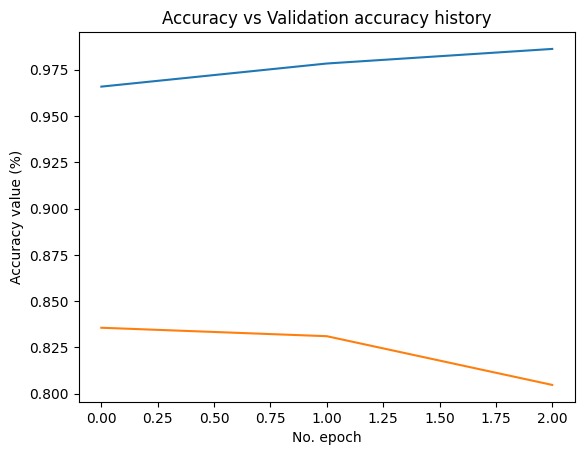

In [ ]:
#Plotting a graph between training and testing accuracy
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.title('Accuracy vs Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')

## Confusion Matrix


The code below generates a heatmap visualization of the normalized confusion matrix, providing insights into the model's performance in predicting positive and negative labels.

782/782 [==============================] - 4s 5ms/step


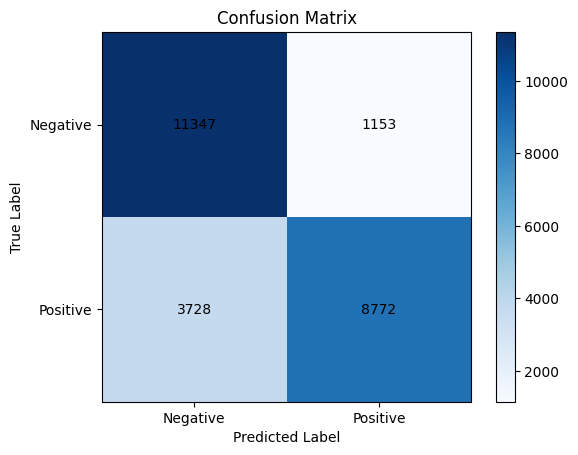

In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions on the test set
y_pred = model.predict(x_test_seq)
# Convert the predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Add the count values in the cells
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()


## GRU Model for Sentiment Analysis

The model architecture consists of an input layer, an embedding layer, a GRU layer, dropout regularization, a dense layer for classification, and a sigmoid activation function.

In [ ]:
gru_input = Input(shape=(100,))
embedding = Embedding(num_classification_words, 128, input_length=words_limit)(gru_input)
gru = GRU(128)(embedding)
dropout = Dropout(0.4)(gru)
#dense_middle = Dense(128)(dropout)
#dropout2 = Dropout(0.4)(dense_middle)
dense = Dense(1)(dropout)
activation = Activation('sigmoid')(dense)
model = Model(gru_input, activation)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2,659,201
Trainable params: 2,659,201
Non-tra

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_seq, y_train, batch_size=32, epochs=3, validation_data=(x_test_seq, y_test))

Epoch 1/3
782/782 [==============================] - 53s 64ms/step - loss: 0.4360 - accuracy: 0.7920 - val_loss: 0.3492 - val_accuracy: 0.8459
Epoch 2/3
782/782 [==============================] - 18s 23ms/step - loss: 0.2255 - accuracy: 0.9142 - val_loss: 0.3377 - val_accuracy: 0.8521
Epoch 3/3
782/782 [==============================] - 20s 26ms/step - loss: 0.1192 - accuracy: 0.9570 - val_loss: 0.4308 - val_accuracy: 0.8490


## Performance Measures

In [ ]:
score, acc = model.evaluate(x_test_seq, y_test, batch_size=32)
print("Score: ",score)
print("Accuracy: ",acc)

782/782 [==============================] - 5s 6ms/step - loss: 0.4308 - accuracy: 0.8490
Score:  0.4308217167854309
Accuracy:  0.8490399718284607


Text(0.5, 0, 'No. epoch')

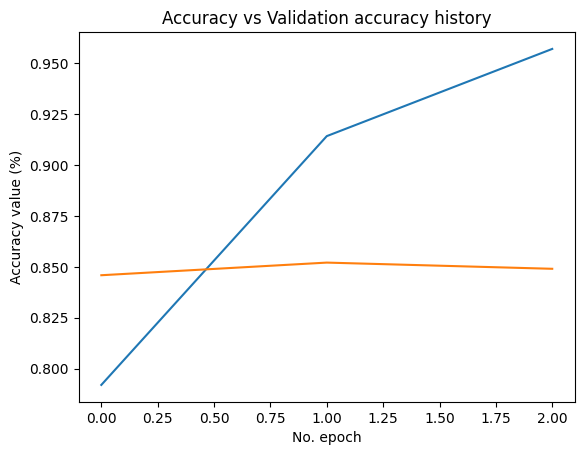

In [ ]:
#Plotting a graph between training and testing accuracy
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.title('Accuracy vs Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')

Text(0.5, 0, 'No. epoch')

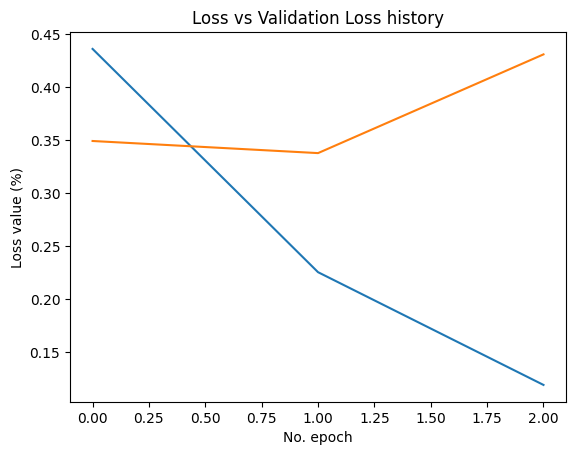

In [ ]:
#Plotting a graph between training and testing accuracy
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.title('Loss vs Validation Loss history')
plt.ylabel('Loss value (%)')
plt.xlabel('No. epoch')

## Confusion Matrix

The code below generates a heatmap visualization of the normalized confusion matrix, providing insights into the model's performance in predicting positive and negative labels.

782/782 [==============================] - 4s 5ms/step


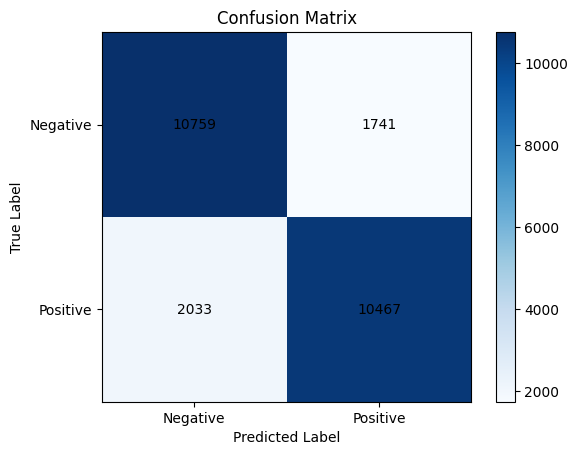

In [ ]:
# Make predictions on the test set
y_pred = model.predict(x_test_seq)
# Convert the predicted probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Add the count values in the cells
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()


## **Conclusion**

On IMDB dataset, LSTM gives an accuracy of **80%** and a loss value is 0.73 whereas GRU gives an accuracy of **84%** and a loss is equal to 0.43.